##SUPERMARKET SALES ANALYSIS

Importando librerias

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy

Variables Globales

In [7]:
global df_ventas
global df_ventas_limpio

*Importando la Base de Datos .csv*

In [8]:
def obtencion_datos():
    global df_ventas
    df_ventas = pd.read_csv('reporte_ventas.csv', sep = ',')
obtencion_datos()
df_ventas

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Ropa,Zapatillas,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8949,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,São Vicente,São Paulo,Sureste,Ropa,Jeans,522.75,607.40,0.100,546.66,4,2186.64,95.64
8950,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,São Vicente,São Paulo,Sureste,Productos de Limpieza,Bolsas de basura,14.54,19.58,0.100,17.62,4,70.48,12.32
8951,2021-12-04,2021-12-07,Envío rápido,Isis Alves,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,48.83,63.41,0.000,63.41,6,380.46,87.48
8952,2021-06-15,2021-06-15,24 horas,Gustavo Henrique Porto,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Camisetas,395.45,440.46,0.075,407.43,5,2037.15,59.90


Normalización y limpieza de los datos

In [9]:
#Formateamos el tipo de dato de las fechas a uno adecuado
df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

#Eliminar repetidos
df_ventas_limpio = df_ventas.drop_duplicates()

#eliminamos registros de prueba
def eliminar_registros_prueba(df):
  return df.drop(df[df['nombre_cliente'] == 'prueba'].index)
df_ventas_limpio = eliminar_registros_prueba(df_ventas_limpio)

#reiniciamos el index
df_ventas_limpio.reset_index(inplace=True)
df_ventas_limpio.drop(columns=['index'], inplace=True)

#Reemplazamos los nombres de clientes NaN por el valor "missing"
df_ventas_limpio['nombre_cliente'].fillna('missing', inplace=True)


1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño? (Pablo)

In [ ]:
#Code here
df_ventas_limpio

2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el periodo?

In [ ]:
#Code here
df_ventas_limpio

3. ¿Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas? (Jhojan)

In [ ]:
#Code here
df_ventas_limpio

4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

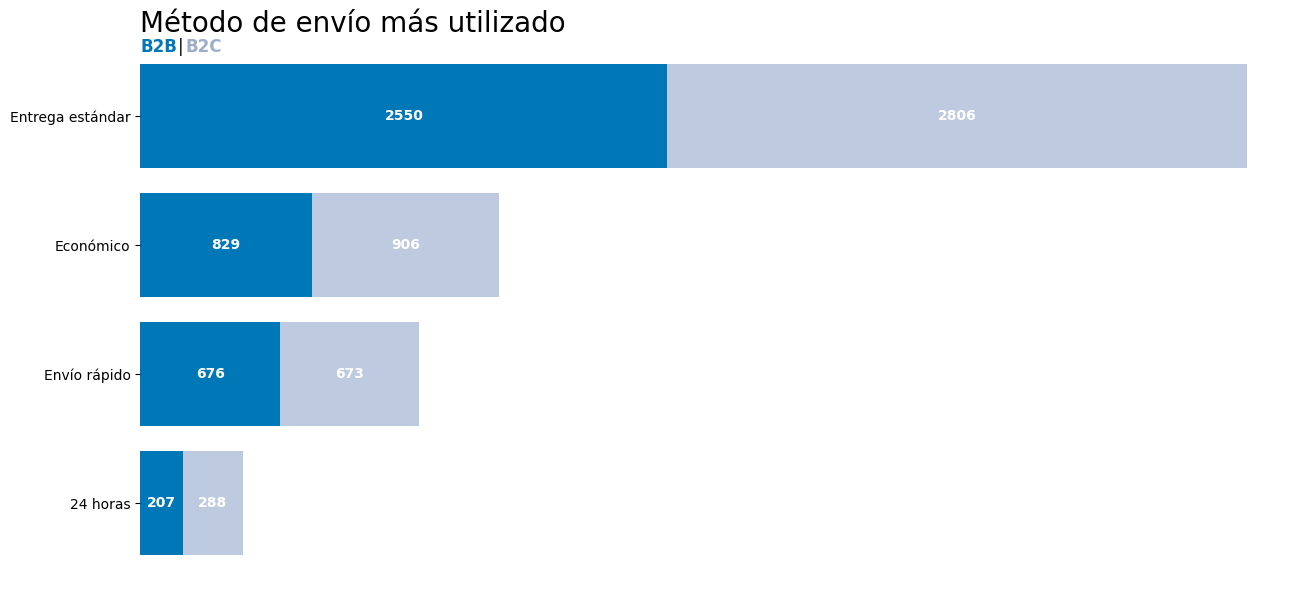

In [11]:
#Code here
def pregunta_4():
  #Preparando los datos
  global df_ventas_limpio
  df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
  modo_envio = df_modo_envio['modo_envio']
  segmento = df_modo_envio['segmento_cliente']
  df_modo_envio = pd.crosstab(index=modo_envio, columns=segmento).sort_values('B2B')
  #Graficando
  fig, ax = plt.subplots(figsize=(15,7))
  plt.box(False)
  plt.gca().xaxis.set_visible(False)
  plt.title('Método de envío más utilizado', loc='left', fontsize=20)
  plt.text(0,3.5,'B2B', color='#0077b6', fontweight='bold', fontsize=12)
  plt.text(180,3.5,'|', fontsize=12)
  plt.text(220,3.5,'B2C', color='#9CACC9', fontweight='bold', fontsize=12)
  x = df_modo_envio.index
  y1 = df_modo_envio['B2B']
  y2 = df_modo_envio['B2C']
  ax.barh(x, y1, color='#0077b6')
  ax.barh(x, y2, left=y1, color='#BECADF')
  for container in ax.containers:
    ax.bar_label(container, label_type='center', labels = (), color="white", fontweight="bold")

pregunta_4()




5. ¿Cuáles son las ventas totales por trimestre en el estado de Sao Paulo? (Everardo)

In [ ]:
#Code here
df_ventas_limpio

6. ¿Existe otro insight que puedas proporcionar?

In [ ]:
#Code here
df_ventas_limpio